# we previously created a subset of QTLs in our benchmark, now we have to test some random examples

In [2]:
import pandas as pd
qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
qtls

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label,match
0,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1,True
1,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1,True
2,chr1,3359707,chr1.3359707,chr1,3369847,rs55665824,G,A,-5.249735,-4.336111,5.249735,4.336111,0.932819,0.43,0.47,0.65,0.354,1,True
3,chr1,11731989,chr1.11731989,chr1,11809402,rs11121820,G,T,-1.585787,-1.229891,1.585787,1.229891,0.197824,0.37,0.32,0.40,-4.200,1,True
4,chr1,11964848,chr1.11964848,chr1,12042261,rs2236055,A,G,2.366937,1.784808,2.366937,1.784808,3.482362,0.23,0.22,0.64,2.110,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,chr9,140058004,chr9.140058004,chr9,140938183,rs3750506,A,G,0.487228,1.529274,0.487228,1.529274,-0.580919,0.22,0.33,0.38,-7.050,-1,True
17502,chr9,140073118,chr9.140073118,chr9,140953297,rs10780199,G,A,2.804388,5.312007,2.804388,5.312007,0.245404,0.31,0.40,0.29,0.961,-1,True
17503,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,0.444036,1.583811,-0.606667,0.19,0.22,0.25,-0.890,-1,True
17504,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,1.363332,1.703144,0.489617,0.42,0.14,0.16,0.118,-1,True


In [3]:
#some other things to load in
import numpy as np
genome = np.load('/data1/lesliec/sarthak/data/chrombpnet_test/hg38_tokenized.npz')
genome_loaded = {}
for key in genome:
    genome_loaded[key] = genome[key][:]

bims = {}
for i in range(1,23):
    bim_path = f'/data1/deyk/extras/1000G_BIMS_hg38/1000G.EUR.QC.{i}.bim'
    bim = pd.read_csv(bim_path, sep='\t', header=None)
    bims[i] = bim
    
bim_pos = {
    chrom: dict(zip(bims[chrom][1].values, bims[chrom][3].index))
    for chrom in bims
}
bim_pos #just maps the rsid and chromosome to the index in the bim file

{1: {'rs575272151': 0,
  'rs544419019': 1,
  'rs540538026': 2,
  'rs62635286': 3,
  'rs200579949': 4,
  'rs531730856': 5,
  'rs554008981': 6,
  'rs546169444': 7,
  'rs531646671': 8,
  'rs541940975': 9,
  'rs199856693': 10,
  'rs564003018': 11,
  'rs374029747': 12,
  'rs568149713': 13,
  'rs2691315': 14,
  'rs199745162': 15,
  'rs564023708': 16,
  'rs533090414': 17,
  'rs806731': 18,
  'rs542415070': 19,
  'rs559500163': 20,
  'rs528344458': 21,
  'rs551668143': 22,
  'rs565211799': 23,
  'rs559190862': 24,
  'rs575564077': 25,
  'rs2691277': 26,
  'rs530867301': 27,
  'rs141149254': 28,
  'rs552304420': 29,
  'rs569799965': 30,
  'rs3091274': 31,
  'rs114420996': 32,
  'rs547227933': 33,
  'rs62637817': 34,
  'rs541415601': 35,
  'rs527362206': 36,
  'rs184286948': 37,
  'rs62637820': 38,
  'rs557590765': 39,
  'rs62639100': 40,
  'rs80011619': 41,
  'rs552815263': 42,
  'rs181431124': 43,
  'rs62639104': 44,
  'rs181028663': 45,
  'rs545950684': 46,
  'rs571658168': 47,
  'rs532215594

In [10]:
#let's see given the first example what the starting points would be
rsid = qtls['SNPname2'].values[0]
chrom = qtls['chrom_hg19'].values[0]
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
bimval

0            1
1    rs7417106
2     0.681682
3       976215
4            A
5            G
Name: 1052, dtype: object

In [11]:
#and let's check the genome
genome_loaded[chrom][bimval[3]-1]

7

In [12]:
midpoint = bimval[3]-1
start = midpoint - 524288//2
end = start + 524288
genome_loaded[chrom][start:end].shape

(524288,)

In [17]:
start,end

(714070, 1238358)

In [15]:
pooled_coords = np.arange(start,end,128)
len(pooled_coords)

4096

In [16]:
pooled_coords

array([ 714070,  714198,  714326, ..., 1237974, 1238102, 1238230])

In [18]:
#let's see what enformer coords will be
enf_start = midpoint-196608//2
enf_end = midpoint+196608//2
enf_start, enf_end

(877910, 1074518)

In [19]:
enf_coords = np.arange(enf_start, enf_end, 128)
len(enf_coords)

1536

In [20]:
np.where(pooled_coords == 877910)

(array([1280]),)

In [ ]:
pooled_coords[1280:], enf_coords #yessir, perfect match, just ones' extended other isn't, still centered around the snp!! That's perfect tho!!

(array([ 877910,  878038,  878166, ..., 1237974, 1238102, 1238230]),
 array([ 877910,  878038,  878166, ..., 1074134, 1074262, 1074390]))

In [ ]:
genome[chrom][midpoint-6:midpoint+6] #to get an idea of if our midpoint from the sequence is actually correct

array([10,  9,  8,  8,  8,  8,  7,  8,  8, 10,  9,  8], dtype=int8)

In [ ]:
seq = genome_loaded[chrom][start:end]
seq[524288//2-6:524288//2+6] #this is the sequence around the midpoint, let's see if it matches the snp, yes so can do this for the midpoint

array([10,  9,  8,  8,  8,  8,  7,  8,  8, 10,  9,  8], dtype=int8)

# now testing it with our model

In [1]:
#can easily make it work by simply inputting the modified sequences into the model
import pandas as pd
qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
#some other things to load in
import numpy as np
genome = np.load('/data1/lesliec/sarthak/data/chrombpnet_test/hg38_tokenized.npz')
genome_loaded = {}
for key in genome:
    genome_loaded[key] = genome[key][:]

bims = {}
for i in range(1,23):
    bim_path = f'/data1/deyk/extras/1000G_BIMS_hg38/1000G.EUR.QC.{i}.bim'
    bim = pd.read_csv(bim_path, sep='\t', header=None)
    bims[i] = bim
    
bim_pos = {
    chrom: dict(zip(bims[chrom][1].values, bims[chrom][3].index))
    for chrom in bims
}
bim_pos #just maps the rsid and chromosome to the index in the bim file

{1: {'rs575272151': 0,
  'rs544419019': 1,
  'rs540538026': 2,
  'rs62635286': 3,
  'rs200579949': 4,
  'rs531730856': 5,
  'rs554008981': 6,
  'rs546169444': 7,
  'rs531646671': 8,
  'rs541940975': 9,
  'rs199856693': 10,
  'rs564003018': 11,
  'rs374029747': 12,
  'rs568149713': 13,
  'rs2691315': 14,
  'rs199745162': 15,
  'rs564023708': 16,
  'rs533090414': 17,
  'rs806731': 18,
  'rs542415070': 19,
  'rs559500163': 20,
  'rs528344458': 21,
  'rs551668143': 22,
  'rs565211799': 23,
  'rs559190862': 24,
  'rs575564077': 25,
  'rs2691277': 26,
  'rs530867301': 27,
  'rs141149254': 28,
  'rs552304420': 29,
  'rs569799965': 30,
  'rs3091274': 31,
  'rs114420996': 32,
  'rs547227933': 33,
  'rs62637817': 34,
  'rs541415601': 35,
  'rs527362206': 36,
  'rs184286948': 37,
  'rs62637820': 38,
  'rs557590765': 39,
  'rs62639100': 40,
  'rs80011619': 41,
  'rs552815263': 42,
  'rs181431124': 43,
  'rs62639104': 44,
  'rs181028663': 45,
  'rs545950684': 46,
  'rs571658168': 47,
  'rs532215594

In [2]:
#now we can load our model in
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348625/checkpoints/08-val_loss=0.00000.ckpt'

import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
evals = Evals(ckpt_path,device=3)

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


In [3]:
#now what we do is we loop through, get the positions, then we can evaluate it

qtls.iloc[0]

chrom_hg18                chr1
pos_hg18                901458
SNPname1           chr1.901458
chrom_hg19                chr1
pos_hg19                911595
SNPname2             rs7417106
allele1                      G
allele2                      A
gkm_SVM               2.821422
kmer_SVM              6.027648
abs_gkm_SVM           2.821422
abs_kmer_SVM          6.027648
CADD                  1.739152
GWAVA_region              0.29
GWAVA_tss                 0.36
GWAVA_unmatched           0.89
GERP                      2.15
label                        1
match                     True
Name: 0, dtype: object

In [4]:
rsid = qtls.iloc[0]['SNPname2']
chrom = qtls.iloc[0]['chrom_hg19']
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
bimval

0            1
1    rs7417106
2     0.681682
3       976215
4            A
5            G
Name: 1052, dtype: object

In [ ]:
(qtls['chrom_hg19'] == qtls['chrom_hg18']).value_counts() #good at least the chromosome matches lol, and a single mismatch with hg38 bims, but it's fine!

True    17506
Name: count, dtype: int64

In [8]:
midpoint = bimval[3]-1
start = midpoint - 524288//2
end = start + 524288
# chrom = bimval[0]
print(start,end,chrom)

#can do checks like asserting chrom matches, or just leave as is?

714070 1238358 chr1


In [9]:
evals.dataset.expand_seqs(chrom,start,end)

1937

In [10]:
data = evals.dataset[1937]

In [11]:
data[0][0].shape, data[0][1].shape, data[1][0].shape, data[1][1].shape

(torch.Size([6, 524288]),
 torch.Size([2, 524288]),
 torch.Size([524288, 6]),
 torch.Size([524288, 2]))

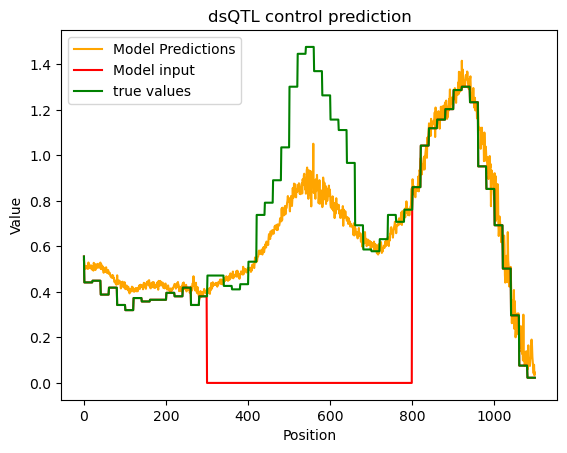

In [18]:
si = 524288//2 - 250
se = 524288//2 + 250
out = evals.mask(si,se, 1937, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control prediction')
plt.legend()

In [ ]:
#now we modify the input, can't use data direclty since it does the random masking!

out[-2][0,:,524288//2] #it's an A as expected? now let's change it to a G!
#importantly tho we need to chagne the seq unmask as that's what is used by the mask function, inputs are actually not used because of the masking...

tensor([1., 0., 0., 0., 0., 0.], device='cuda:3')

In [25]:
out[2][524288//2]

tensor([1., 0., 0., 0., 0., 0.])

In [26]:
modified_input = out[2].clone()
modified_input[524288//2,0] = 0 #set A to 0
modified_input[524288//2,2] = 1 #set G to 1
modified_input[524288//2]

tensor([0., 0., 1., 0., 0., 0.])

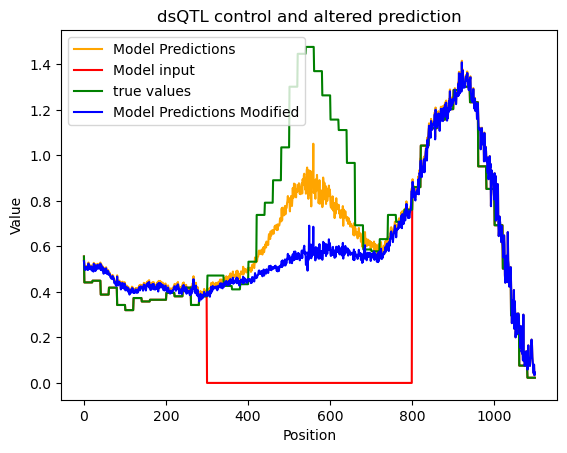

In [27]:
data = (None,None,modified_input,out[3])
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

In [30]:
#just want to make sure it's done properly
((s,a),(su,au)) = evals.dataset[1937]
data = (s,a,su,au)
data[0].shape, data[1].shape, data[2].shape, data[3].shape

(torch.Size([6, 524288]),
 torch.Size([2, 524288]),
 torch.Size([524288, 6]),
 torch.Size([524288, 2]))

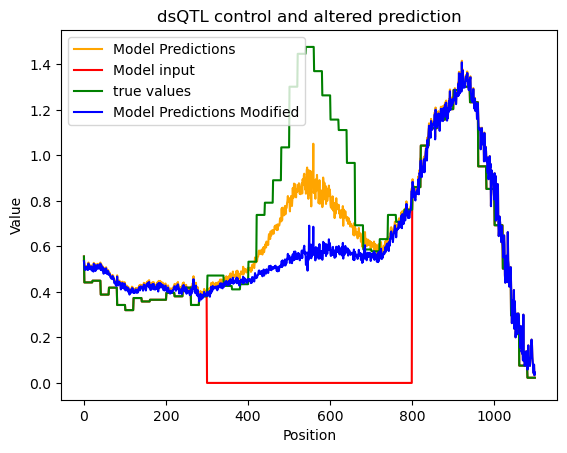

In [ ]:
((s,a),(su,au)) = evals.dataset[1937]
data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
out = evals.mask(si,se, data=data, mask_accessibility=True)
data[2][524288//2,0] = 0 #set A to 0
data[2][524288//2,2] = 1 #set G to 1
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

In [34]:
#let's take another example, one that is a negative set

rsid = qtls.iloc[-1]['SNPname2']
chrom = qtls.iloc[-1]['chrom_hg19']
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
midpoint = bimval[3]-1
start = midpoint - 524288//2
end = start + 524288
# chrom = bimval[0]
print(start,end,chrom)

evals.dataset.expand_seqs(chrom,start,end)

137947068 138471356 chr9


1938

In [46]:
rsid = qtls.iloc[-1]['SNPname2']
chrom = qtls.iloc[-1]['chrom_hg19']
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
bimval

0             9
1    rs12340415
2     180.46023
3     138209213
4             G
5             C
Name: 437797, dtype: object

In [ ]:
#and see what original one was
data = evals.dataset[1938]
data[1][0][524288//2] #here change C to G

tensor([0., 1., 0., 0., 0., 0.])

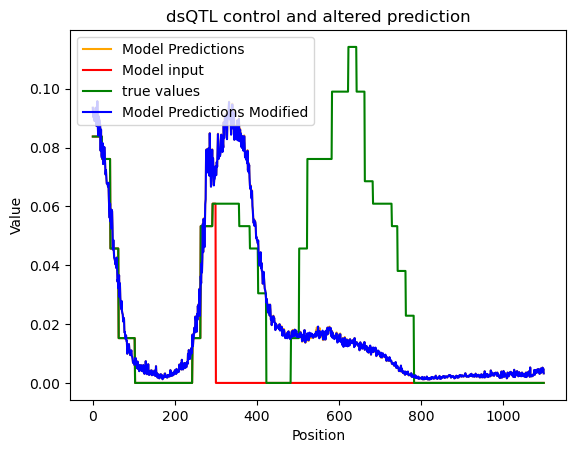

In [49]:
((s,a),(su,au)) = evals.dataset[1938]
data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
out = evals.mask(si,se, data=data, mask_accessibility=True)
data[2][524288//2,1] = 0 #set C to 0
data[2][524288//2,2] = 1 #set G to 1
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

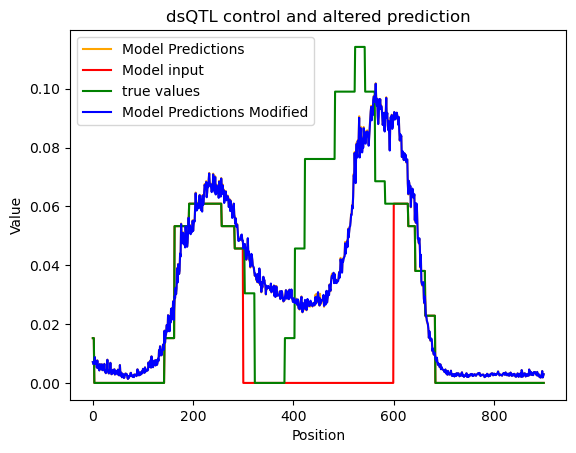

In [50]:
si = 524288//2 - 150
se = 524288//2 + 150
((s,a),(su,au)) = evals.dataset[1938]
data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
out = evals.mask(si,se, data=data, mask_accessibility=True)
data[2][524288//2,1] = 0 #set C to 0
data[2][524288//2,2] = 1 #set G to 1
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

In [44]:
#let's look at one more example

rsid = qtls.iloc[1]['SNPname2']
chrom = qtls.iloc[1]['chrom_hg19']
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
midpoint = bimval[3]-1
start = midpoint - 524288//2
end = start + 524288
# chrom = bimval[0]
print(start,end,chrom)

evals.dataset.expand_seqs(chrom,start,end)

988977 1513265 chr1


1939

In [51]:
rsid = qtls.iloc[1]['SNPname2']
chrom = qtls.iloc[1]['chrom_hg19']
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
bimval

0            1
1    rs6603785
2     1.190243
3      1251122
4            T
5            A
Name: 2500, dtype: object

In [ ]:
#see what the input was
data = evals.dataset[1939]
data[1][0][524288//2] #here change A to T

tensor([1., 0., 0., 0., 0., 0.])

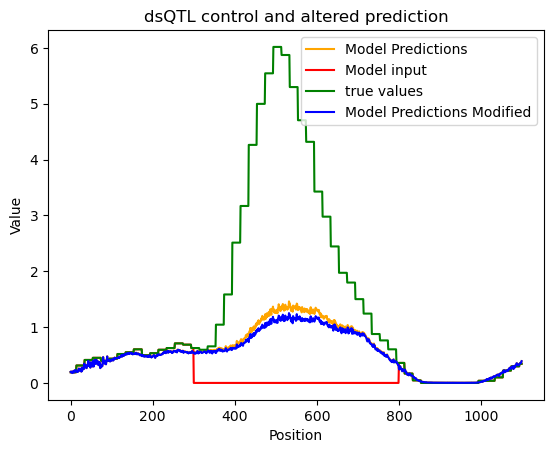

In [53]:
si = 524288//2 - 250
se = 524288//2 + 250
((s,a),(su,au)) = evals.dataset[1939]
data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
out = evals.mask(si,se, data=data, mask_accessibility=True)
data[2][524288//2,0] = 0 #set A to 0
data[2][524288//2,3] = 1 #set T to 1
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

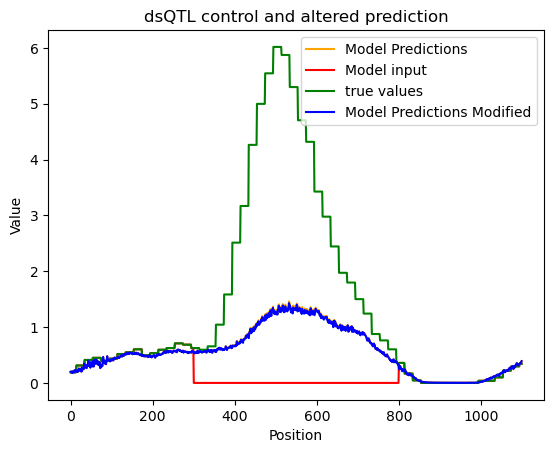

In [55]:
#see if we do the wrong varaints

si = 524288//2 - 250
se = 524288//2 + 250
((s,a),(su,au)) = evals.dataset[1939]
data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
out = evals.mask(si,se, data=data, mask_accessibility=True)
data[2][524288//2,0] = 0 #set A to 0
data[2][524288//2,2] = 1 #set T to 1
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

In [56]:
#let's do one final example of another negative control
rsid = qtls.iloc[-2]['SNPname2']
chrom = qtls.iloc[-2]['chrom_hg19']
bimrow = bim_pos[int(chrom[3:])][rsid]
bimval = bims[int(chrom[3:])].iloc[bimrow]
print(bimval)
midpoint = bimval[3]-1
start = midpoint - 524288//2
end = start + 524288
# chrom = bimval[0]
print(start,end,chrom)

evals.dataset.expand_seqs(chrom,start,end)

0            9
1    rs4066694
2    180.40136
3    138166848
4            T
5            C
Name: 437671, dtype: object
137904703 138428991 chr9


1940

In [57]:
data = evals.dataset[1940]
data[1][0][524288//2] #here change C to T

tensor([0., 1., 0., 0., 0., 0.])

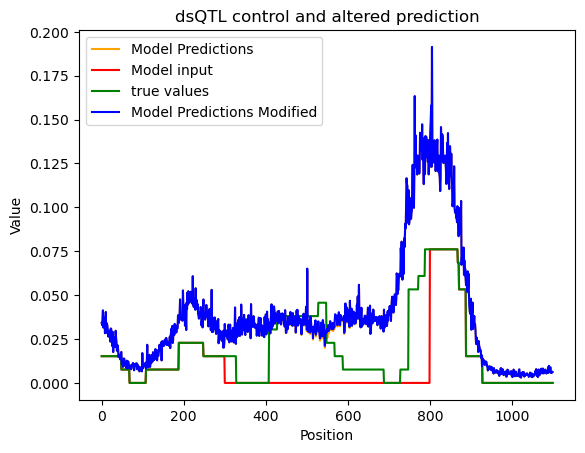

In [58]:
si = 524288//2 - 250
se = 524288//2 + 250
((s,a),(su,au)) = evals.dataset[1940]
data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
out = evals.mask(si,se, data=data, mask_accessibility=True)
data[2][524288//2,1] = 0 #set C to 0
data[2][524288//2,3] = 1 #set T to 1
out2 = evals.mask(si,se, data=data, mask_accessibility=True)
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

In [ ]:
#let's run enformer on these handful of examples to compare, hard to tho because coverage so different

In [60]:
#now can run benchmark genome wide!, basically save these results out?
qtls.iloc[0]['chrom_hg19']

'chr1'

# make job that evaluates for all

In [ ]:
#we'll save out th emiddle 500, since that's what we are changing!

ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348625/checkpoints/08-val_loss=0.00000.ckpt'

import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
evals = Evals(ckpt_path,device=1)

mapping = {
    'A': torch.tensor([1, 0, 0, 0], dtype=torch.float32),
    'C': torch.tensor([0, 1, 0, 0], dtype=torch.float32),
    'G': torch.tensor([0, 0, 1, 0], dtype=torch.float32),
    'T': torch.tensor([0, 0, 0, 1], dtype=torch.float32),
    'N': torch.tensor([0, 0, 0, 0], dtype=torch.float32),
}

onehot_mapping = {0:'A',1:'C',2:'G',3:'T'}

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')

bims = {}
for i in range(1,23):
    bim_path = f'/data1/deyk/extras/1000G_BIMS_hg38/1000G.EUR.QC.{i}.bim'
    bim = pd.read_csv(bim_path, sep='\t', header=None)
    bims[i] = bim


bim_pos = {
    chrom: dict(zip(bims[chrom][1].values, bims[chrom][3].index))
    for chrom in bims
}

length = 524288
si = 524288//2 - 250
se = 524288//2 + 250

for i in range(qtls.shape[0]):
    rsid = qtls.iloc[i]['SNPname2']
    chrom = qtls.iloc[i]['chrom_hg19']
    bimrow = bim_pos[int(chrom[3:])][rsid]
    bimval = bims[int(chrom[3:])].iloc[bimrow]
    pos = bimval[3]-1
    start = pos - length//2
    end = pos + length//2
    
    idx = evals.dataset.expand_seqs(chrom,start,end)
    # data = evals.dataset[idx]
    
    ((s,a),(su,au)) = evals.dataset[idx]
    data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
    out = evals.mask(si,se, data=data, mask_accessibility=True)
    
    current_nuc = out[2][524288//2].cpu().numpy()
    current_nuc = np.argmax(current_nuc)
    current_nuc = onehot_mapping[current_nuc]
    
    if current_nuc == bimval[4]:
        alt_key = 5
    elif current_nuc == bimval[5]:
        alt_key = 4
    else:
        raise ValueError("Neither of the alleles match the current nucleotide")
    data[2][524288//2,:4] = mapping[bimval[alt_key]] #I had a slight bug changing out[2] iunstead of data[2], but it works regardless lmao
    
    out2 = evals.mask(si,se, data=data, mask_accessibility=True)
    
    break
    

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


In [3]:
out[2] is data[2]

True

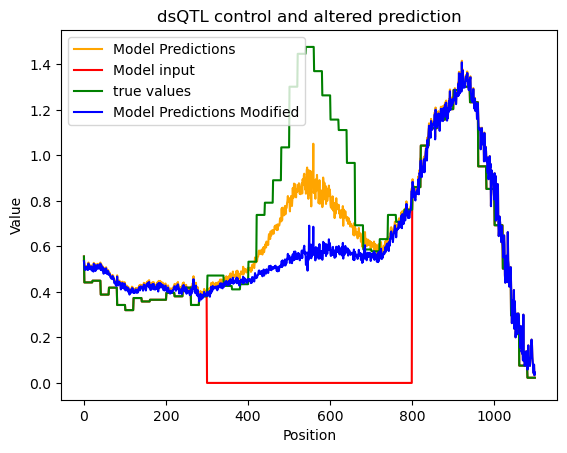

In [2]:
#now test to make sure it makes sense
plt.plot(out[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions', color='orange')
plt.plot(out[-1][0, 0, si-300:se+300].cpu().numpy(), label='Model input', color='red')
plt.plot(out[-3][si-300:se+300,0], label='true values', color='green')
plt.plot(out2[1][0, si-300:se+300, 0].cpu().numpy(), label='Model Predictions Modified', color='blue')
# plt.axvline(x=mi+5-si+300, color='red', linestyle='--', label='SPI1 Motif')
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('dsQTL control and altered prediction')
plt.legend()

#perfeclty identical, the loop works!!

In [1]:
#final thing is what do we save? I sayi the actual, and the changed 500 bp. can get real values and input is just that but cut off, let's see!!
#also try batching to compare speeds

ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348625/checkpoints/08-val_loss=0.00000.ckpt'

import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
evals = Evals(ckpt_path,device=1)

mapping = {
    'A': torch.tensor([1, 0, 0, 0], dtype=torch.float32),
    'C': torch.tensor([0, 1, 0, 0], dtype=torch.float32),
    'G': torch.tensor([0, 0, 1, 0], dtype=torch.float32),
    'T': torch.tensor([0, 0, 0, 1], dtype=torch.float32),
}

onehot_mapping = {0:'A',1:'C',2:'G',3:'T'}

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')

bims = {}
for i in range(1,23):
    bim_path = f'/data1/deyk/extras/1000G_BIMS_hg38/1000G.EUR.QC.{i}.bim'
    bim = pd.read_csv(bim_path, sep='\t', header=None)
    bims[i] = bim


bim_pos = {
    chrom: dict(zip(bims[chrom][1].values, bims[chrom][3].index))
    for chrom in bims
}

length = 524288
si = 524288//2 - 250
se = 524288//2 + 250

output_array = np.zeros((qtls.shape[0],500,2))

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


In [ ]:
import time

for i in tqdm(range(qtls.shape[0])):
    t1 = time.time()
    rsid = qtls.iloc[i]['SNPname2']
    chrom = qtls.iloc[i]['chrom_hg19']
    bimrow = bim_pos[int(chrom[3:])][rsid]
    bimval = bims[int(chrom[3:])].iloc[bimrow]
    pos = bimval[3]-1
    start = pos - length//2
    end = pos + length//2
    
    idx = evals.dataset.expand_seqs(chrom,start,end)
    # data = evals.dataset[idx]
    print('prepare data', time.time()-t1)

    t2 = time.time()
    
    ((s,a),(su,au)) = evals.dataset[idx]
    data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function

    print('load data', time.time()-t2)
    
    torch.cuda.synchronize()
    t3 = time.time()
    
    out = evals.mask(si,se, data=data, mask_accessibility=True)
    torch.cuda.synchronize()
    print('eval 1', time.time()-t3)
    
    t4 = time.time()
    
    current_nuc = out[2][524288//2].cpu().numpy()
    current_nuc = np.argmax(current_nuc)
    current_nuc = onehot_mapping[current_nuc]
    
    
    if current_nuc == bimval[4]:
        alt_key = 5
    elif current_nuc == bimval[5]:
        alt_key = 4
    else:
        raise ValueError("Neither of the alleles match the current nucleotide")

    print('nuc_map', time.time()-t4)

    torch.cuda.synchronize()
    t5 = time.time()
    
    data[2][524288//2,:4] = mapping[bimval[alt_key]]
    
    out2 = evals.mask(si,se, data=data, mask_accessibility=True)

    torch.cuda.synchronize()
    print('eval 2', time.time()-t5)

    t6 = time.time()
    
    pred1 = out[1][0, si:se, 0].cpu().numpy()
    pred2 = out2[1][0, si:se, 0].cpu().numpy()
    output_array[i,:,0] = pred1
    output_array[i,:,1] = pred2
    
    print('assign', time.time()-t6)
    
    if i == 3:
        break

  0%|          | 0/17506 [00:00<?, ?it/s]

prepare data 0.0021347999572753906
load data 2.0227224826812744
eval 1 3.4648454189300537
nuc_map 0.0007884502410888672
eval 2 0.02697157859802246


  0%|          | 1/17506 [00:07<35:22:39,  7.28s/it]

assign 1.5396742820739746
prepare data 0.0022792816162109375
load data 2.1414670944213867
eval 1 0.018755674362182617
nuc_map 8.96453857421875e-05
eval 2 1.5610692501068115


  0%|          | 2/17506 [00:12<29:38:01,  6.09s/it]

assign 1.5430915355682373
prepare data 0.002205371856689453
load data 2.165966510772705
eval 1 0.020545244216918945
nuc_map 0.00011730194091796875
eval 2 1.565495252609253


  0%|          | 3/17506 [00:17<29:00:25,  5.97s/it]

assign 1.5522935390472412
prepare data 0.002117633819580078


KeyboardInterrupt: 

In [3]:
#now loading in the data
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348625/checkpoints/08-val_loss=0.00000.ckpt'

import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
evals = Evals(ckpt_path,device=1,load_data=True)

mapping = {
    'A': torch.tensor([1, 0, 0, 0], dtype=torch.float32),
    'C': torch.tensor([0, 1, 0, 0], dtype=torch.float32),
    'G': torch.tensor([0, 0, 1, 0], dtype=torch.float32),
    'T': torch.tensor([0, 0, 0, 1], dtype=torch.float32),
}

onehot_mapping = {0:'A',1:'C',2:'G',3:'T'}

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')

bims = {}
for i in range(1,23):
    bim_path = f'/data1/deyk/extras/1000G_BIMS_hg38/1000G.EUR.QC.{i}.bim'
    bim = pd.read_csv(bim_path, sep='\t', header=None)
    bims[i] = bim


bim_pos = {
    chrom: dict(zip(bims[chrom][1].values, bims[chrom][3].index))
    for chrom in bims
}

length = 524288
si = 524288//2 - 250
se = 524288//2 + 250

output_array = np.zeros((qtls.shape[0],500,2))

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


In [4]:
import time

for i in tqdm(range(qtls.shape[0])):
    t1 = time.time()
    rsid = qtls.iloc[i]['SNPname2']
    chrom = qtls.iloc[i]['chrom_hg19']
    bimrow = bim_pos[int(chrom[3:])][rsid]
    bimval = bims[int(chrom[3:])].iloc[bimrow]
    pos = bimval[3]-1
    start = pos - length//2
    end = pos + length//2
    
    idx = evals.dataset.expand_seqs(chrom,start,end)
    # data = evals.dataset[idx]
    print('prepare data', time.time()-t1)

    t2 = time.time()
    
    ((s,a),(su,au)) = evals.dataset[idx]
    data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function

    print('load data', time.time()-t2)
    
    torch.cuda.synchronize()
    t3 = time.time()
    
    out = evals.mask(si,se, data=data, mask_accessibility=True)
    torch.cuda.synchronize()
    print('eval 1', time.time()-t3)
    
    t4 = time.time()
    
    current_nuc = out[2][524288//2].cpu().numpy()
    current_nuc = np.argmax(current_nuc)
    current_nuc = onehot_mapping[current_nuc]
    
    
    if current_nuc == bimval[4]:
        alt_key = 5
    elif current_nuc == bimval[5]:
        alt_key = 4
    else:
        raise ValueError("Neither of the alleles match the current nucleotide")

    print('nuc_map', time.time()-t4)

    torch.cuda.synchronize()
    t5 = time.time()
    
    data[2][524288//2,:4] = mapping[bimval[alt_key]]
    
    out2 = evals.mask(si,se, data=data, mask_accessibility=True)

    torch.cuda.synchronize()
    print('eval 2', time.time()-t5)

    t6 = time.time()
    
    pred1 = out[1][0, si:se, 0].cpu().numpy()
    pred2 = out2[1][0, si:se, 0].cpu().numpy()
    output_array[i,:,0] = pred1
    output_array[i,:,1] = pred2
    
    print('assign', time.time()-t6)

  0%|          | 0/17506 [00:00<?, ?it/s]

prepare data 0.0017018318176269531
load data 0.059326887130737305
eval 1 3.528923273086548
nuc_map 0.0007045269012451172
eval 2 0.022484540939331055


  0%|          | 1/17506 [00:05<26:03:03,  5.36s/it]

assign 1.5432980060577393
prepare data 0.0024187564849853516
load data 0.02080702781677246
eval 1 0.018080472946166992
nuc_map 9.059906005859375e-05
eval 2 1.5584144592285156


  0%|          | 2/17506 [00:08<19:42:50,  4.05s/it]

assign 1.5414655208587646
prepare data 0.00252532958984375
load data 0.08212661743164062
eval 1 0.028473854064941406
nuc_map 0.00010728836059570312
eval 2 1.5583195686340332


  0%|          | 3/17506 [00:11<17:50:54,  3.67s/it]

assign 1.5416717529296875
prepare data 0.002476215362548828
load data 0.0853877067565918
eval 1 0.02715325355529785
nuc_map 9.703636169433594e-05
eval 2 1.5569956302642822


  0%|          | 4/17506 [00:14<16:58:38,  3.49s/it]

assign 1.543933391571045
prepare data 0.0023496150970458984
load data 0.04287290573120117
eval 1 0.018507957458496094
nuc_map 7.605552673339844e-05
eval 2 1.5623726844787598


  0%|          | 5/17506 [00:18<16:25:00,  3.38s/it]

assign 1.5456655025482178
prepare data 0.0020322799682617188
load data 0.029901981353759766
eval 1 0.022296667098999023
nuc_map 7.915496826171875e-05
eval 2 1.5642931461334229


  0%|          | 6/17506 [00:21<16:04:39,  3.31s/it]

assign 1.5526652336120605
prepare data 0.0020787715911865234
load data 0.024784564971923828
eval 1 0.019102096557617188
nuc_map 7.677078247070312e-05
eval 2 1.5645792484283447


  0%|          | 7/17506 [00:24<15:50:57,  3.26s/it]

assign 1.5521254539489746
prepare data 0.0011553764343261719
load data 0.021345138549804688
eval 1 0.01732158660888672
nuc_map 7.390975952148438e-05


  0%|          | 7/17506 [00:26<18:04:50,  3.72s/it]


KeyboardInterrupt: 

In [1]:
#seems some weird issue with 1846, let's test

ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348625/checkpoints/08-val_loss=0.00000.ckpt'

import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
evals = Evals(ckpt_path,device = 1)

mapping = {
    'A': torch.tensor([1, 0, 0, 0], dtype=torch.float32),
    'C': torch.tensor([0, 1, 0, 0], dtype=torch.float32),
    'G': torch.tensor([0, 0, 1, 0], dtype=torch.float32),
    'T': torch.tensor([0, 0, 0, 1], dtype=torch.float32),
    'N': torch.tensor([0, 0, 0, 0], dtype=torch.float32),
}

onehot_mapping = {0:'A',1:'C',2:'G',3:'T'}

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')

bims = {}
for i in range(1,23):
    bim_path = f'/data1/deyk/extras/1000G_BIMS_hg38/1000G.EUR.QC.{i}.bim'
    bim = pd.read_csv(bim_path, sep='\t', header=None)
    bims[i] = bim


bim_pos = {
    chrom: dict(zip(bims[chrom][1].values, bims[chrom][3].index))
    for chrom in bims
}

length = 524288
si = 524288//2 - 250
se = 524288//2 + 250

output_array = np.zeros((qtls.shape[0],500,2))

for i in tqdm(range(qtls.shape[0])):
    if i < 1845:
        continue
    rsid = qtls.iloc[i]['SNPname2']
    chrom = qtls.iloc[i]['chrom_hg19']
    bimrow = bim_pos[int(chrom[3:])][rsid]
    bimval = bims[int(chrom[3:])].iloc[bimrow]
    pos = bimval[3]-1
    start = pos - length//2
    end = pos + length//2
    
    idx = evals.dataset.expand_seqs(chrom,start,end)
    # data = evals.dataset[idx]
    
    ((s,a),(su,au)) = evals.dataset[idx]
    data = (None,None,su,au) #can be s and a or None, it isn't used by the mask function
    out = evals.mask(si,se, data=data, mask_accessibility=True)
    
    current_nuc = out[2][524288//2].cpu().numpy()
    current_nuc = np.argmax(current_nuc)
    current_nuc = onehot_mapping[current_nuc]
    
    if current_nuc == bimval[4]:
        alt_key = 5
    elif current_nuc == bimval[5]:
        alt_key = 4
    else:
        raise ValueError("Neither of the alleles match the current nucleotide")
    
    data[2][524288//2,:4] = mapping[bimval[alt_key]]
    
    out2 = evals.mask(si,se, data=data, mask_accessibility=True)
    
    pred1 = out[1][0, si:se, 0].cpu().numpy()
    pred2 = out2[1][0, si:se, 0].cpu().numpy()
    output_array[i,:,0] = pred1
    output_array[i,:,1] = pred2

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


 11%|█         | 1851/17506 [00:33<04:39, 56.08it/s] 


KeyboardInterrupt: 

In [ ]:
print(start,end)
#ok so my code skipped checking if diff was 0, so I fixed it, so sequence was 0!

-109674 414614


# I ran the benchmark, now test!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')

enformer_preds = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/enformer_dsqtl.npy')
preds = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/basic_dsqtl.npy')
print(preds.shape, enformer_preds.shape)

(17506, 500, 2) (17506, 896, 2)


In [2]:
qtls

,chrom_hg18,pos_hg18,SNPname1,chrom_hg19,pos_hg19,SNPname2,allele1,allele2,gkm_SVM,kmer_SVM,abs_gkm_SVM,abs_kmer_SVM,CADD,GWAVA_region,GWAVA_tss,GWAVA_unmatched,GERP,label,match
0,chr1,901458,chr1.901458,chr1,911595,rs7417106,G,A,2.821422,6.027648,2.821422,6.027648,1.739152,0.29,0.36,0.89,2.150,1,True
1,chr1,1176365,chr1.1176365,chr1,1186502,rs6603785,T,A,-7.167236,-10.870018,7.167236,10.870018,-0.091378,0.42,0.49,0.66,0.451,1,True
2,chr1,3359707,chr1.3359707,chr1,3369847,rs55665824,G,A,-5.249735,-4.336111,5.249735,4.336111,0.932819,0.43,0.47,0.65,0.354,1,True
3,chr1,11731989,chr1.11731989,chr1,11809402,rs11121820,G,T,-1.585787,-1.229891,1.585787,1.229891,0.197824,0.37,0.32,0.40,-4.200,1,True
4,chr1,11964848,chr1.11964848,chr1,12042261,rs2236055,A,G,2.366937,1.784808,2.366937,1.784808,3.482362,0.23,0.22,0.64,2.110,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,chr9,140058004,chr9.140058004,chr9,140938183,rs3750506,A,G,0.487228,1.529274,0.487228,1.529274,-0.580919,0.22,0.33,0.38,-7.050,-1,True
17502,chr9,140073118,chr9.140073118,chr9,140953297,rs10780199,G,A,2.804388,5.312007,2.804388,5.312007,0.245404,0.31,0.40,0.29,0.961,-1,True
17503,chr9,140155407,chr9.140155407,chr9,141035586,rs7852209,T,C,0.444036,-1.583811,0.444036,1.583811,-0.606667,0.19,0.22,0.25,-0.890,-1,True
17504,chr9,140181121,chr9.140181121,chr9,141061300,rs4066694,T,C,1.363332,1.703144,1.363332,1.703144,0.489617,0.42,0.14,0.16,0.118,-1,True


In [5]:
labels = qtls['label'].to_numpy()
labels.shape

(17506,)

In [11]:
#first do a violinplot

preds_avg = np.mean(np.abs(preds[:,:,0]-preds[:,:,1]), axis=1)
enformer_preds_avg = np.mean(np.abs(enformer_preds[:,:,0]-enformer_preds[:,:,1]), axis=1)

print(preds_avg.shape, enformer_preds_avg.shape)
avg_diff = np.stack([preds_avg, enformer_preds_avg], axis=1)
avg_diff.shape

(17506,) (17506,)


(17506, 2)

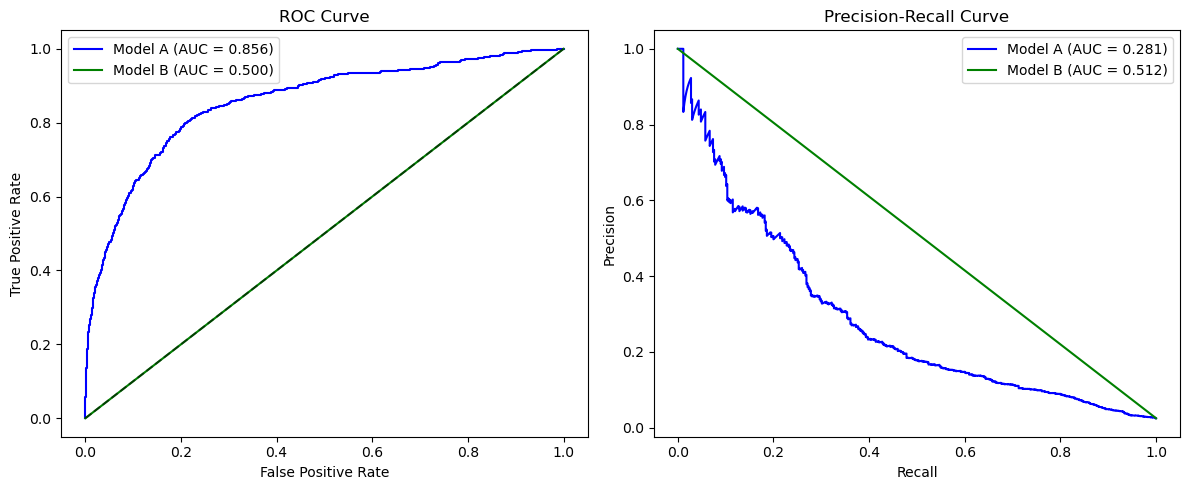

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Replace these with your data
# preds = np.array(...)  # shape (17506, 2)
# labels = np.array(...)  # shape (17506,), 0/1

model_names = ['Model A', 'Model B']
colors = ['blue', 'green']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
for i in range(2):
    fpr, tpr, _ = roc_curve(labels, avg_diff[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
for i in range(2):
    precision, recall, _ = precision_recall_curve(labels, avg_diff[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
#this doesn't seem right...
enformer_preds[:,:,0]

array([[0.2191775 , 0.16375121, 0.04715731, ..., 0.07699116, 0.05211791,
        0.01175259],
       [0.2191775 , 0.16375121, 0.04715731, ..., 0.07699116, 0.05211791,
        0.01175259],
       [0.2191775 , 0.16375121, 0.04715731, ..., 0.07699116, 0.05211791,
        0.01175259],
       ...,
       [0.2191775 , 0.16375121, 0.04715731, ..., 0.07699116, 0.05211791,
        0.01175259],
       [0.2191775 , 0.16375121, 0.04715731, ..., 0.07699116, 0.05211791,
        0.01175259],
       [0.2191775 , 0.16375121, 0.04715731, ..., 0.07699116, 0.05211791,
        0.01175259]])

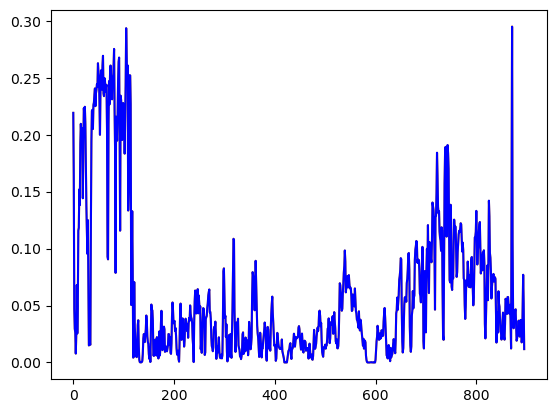

In [16]:
plt.plot(enformer_preds[1,:,0], label='Model Predictions', color='orange')
plt.plot(enformer_preds[1,:,1], label='Model Predictions Modified', color='blue')

In [19]:
enformer_diff = (enformer_preds[:,:,0] - enformer_preds[:,:,1])
enformer_diff.min(), enformer_diff.max()

(-0.00021458417177200317, 0.00035053864121437073)

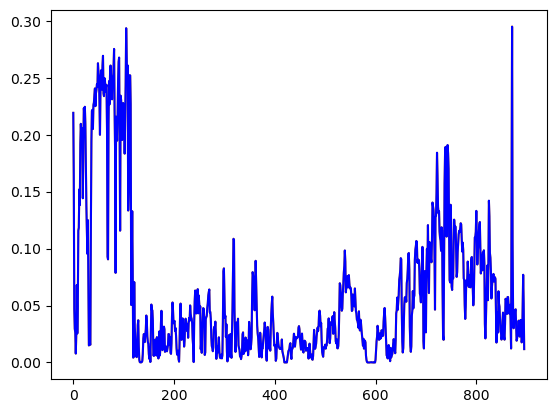

In [21]:
#yeah that's definitely not correct... 
idx = 10
plt.plot(enformer_preds[idx,:,0], label='Model Predictions', color='orange')
plt.plot(enformer_preds[idx,:,1], label='Model Predictions Modified', color='blue')

In [ ]:
#why are all the predictions the same??
#such an obvious bug lmfao!! Let's recompute it and test!

In [23]:
#but we will also look at JSD
from scipy.spatial.distance import jensenshannon

signal1 = preds[:,:,0].T
signal2 = preds[:,:,1].T

# Make sure both are probability distributions
p = signal1 / signal1.sum()
q = signal2 / signal2.sum()

# Returns the *distance* (i.e., square root of JS divergence)
jsd = jensenshannon(p, q)
jsd.shape

(17506,)

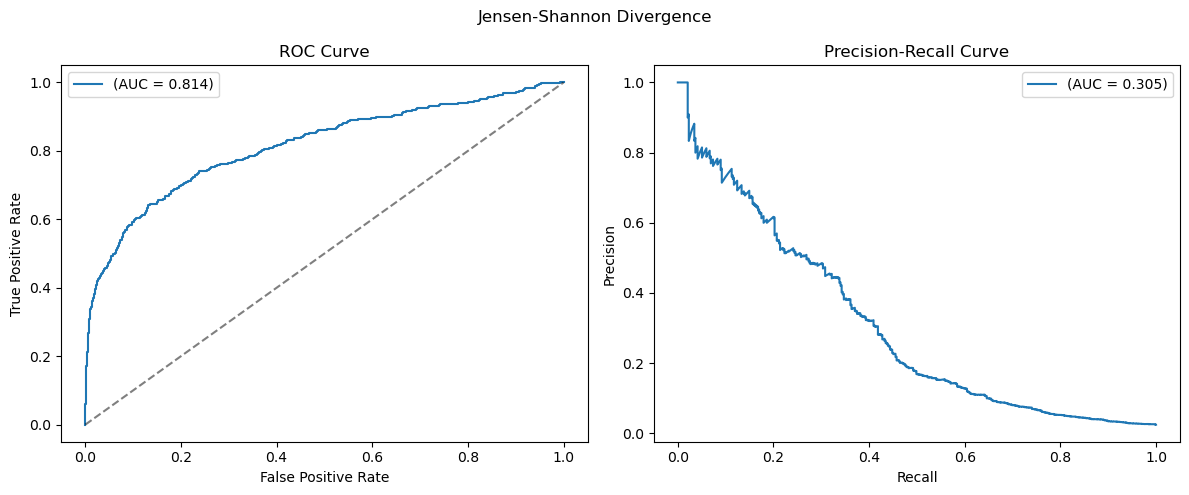

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Replace these with your data
# preds = np.array(...)  # shape (17506, 2)
# labels = np.array(...)  # shape (17506,), 0/1

model_names = ['Model A', 'Model B']
colors = ['blue', 'green']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(labels, jsd)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(labels, jsd)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'(AUC = {pr_auc:.3f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.suptitle('Jensen-Shannon Divergence')

plt.tight_layout()
plt.show()

In [35]:
#let's compute many more then can plot on the same thing
#let's steal from chrombpnet
def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

out = predict_snp_effect_scores(preds[:,:,0], preds[:,:,1])

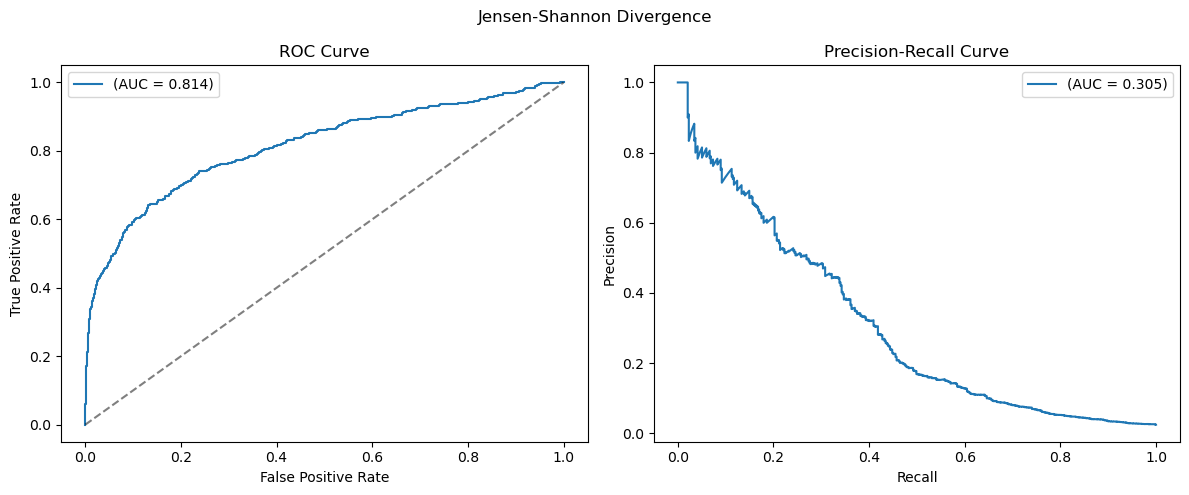

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Replace these with your data
# preds = np.array(...)  # shape (17506, 2)
# labels = np.array(...)  # shape (17506,), 0/1

model_names = ['Model A', 'Model B']
colors = ['blue', 'green']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(labels, out[2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(labels, out[2])
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'(AUC = {pr_auc:.3f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.suptitle('Jensen-Shannon Divergence')

plt.tight_layout()
plt.show()
#it's correct, so we can use this to plot

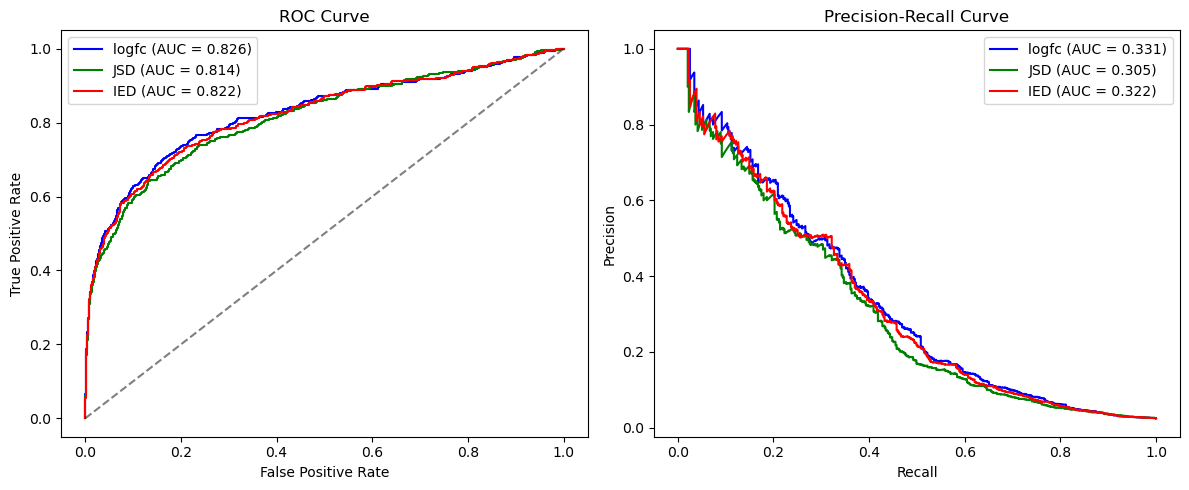

In [37]:
model_names = ['logfc', 'JSD', 'IED']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
for i in range(3):
    fpr, tpr, _ = roc_curve(labels, out[i+1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
for i in range(3):
    precision, recall, _ = precision_recall_curve(labels, out[i+1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
#going to run benchmark on categorical model, let's make sure it makes sense
import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348359/checkpoints/15-val_loss=0.00000.ckpt'
evals = Evals(ckpt_path,device=2)

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=category


In [5]:
evals.skip_softplus

True

In [6]:
out = evals(0)
for i in out:
    print(i.shape)

torch.Size([1, 524288, 5])
torch.Size([1, 524288, 1])
torch.Size([524288, 6])
torch.Size([524288, 3])


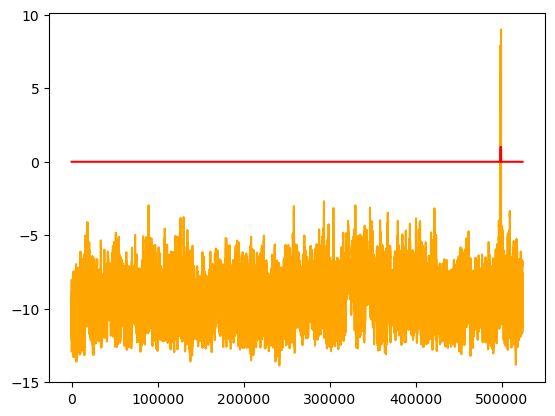

In [7]:
import matplotlib.pyplot as plt
plt.plot(out[1][0,:,0].cpu().numpy(), label='Model Predictions', color='orange') #can be negative because it's pre sigmoid
plt.plot(out[3][:,1].cpu().numpy(), label='true peaks', color='red')

In [8]:
#make sure still doing softplus on the other models
import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
from evals.evals_utils_joint import Evals
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-39-248147/checkpoints/15-val_loss=0.00000.ckpt'
evals = Evals(ckpt_path,device=2)
out = evals(0)
for i in out:
    print(i.shape)

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous
torch.Size([1, 524288, 5])
torch.Size([1, 524288, 1])
torch.Size([524288, 6])
torch.Size([524288, 2])


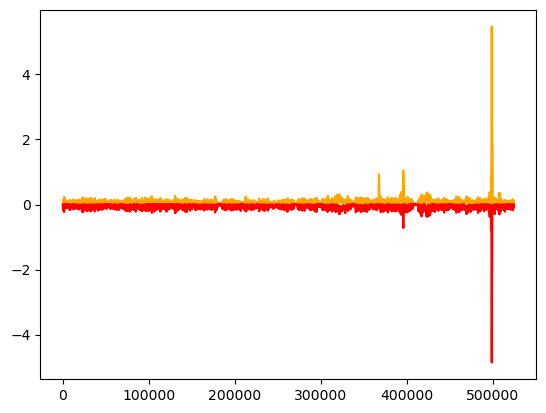

In [ ]:
import matplotlib.pyplot as plt
plt.plot(out[1][0,:,0].cpu().numpy(), label='Model Predictions', color='orange') #can be negative because it's pre sigmoid
plt.plot(-out[3][:,0].cpu().numpy(), label='true peaks', color='red')
#this model does seem substantially better? let's compare to the base model

In [9]:
evals.skip_softplus

False

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


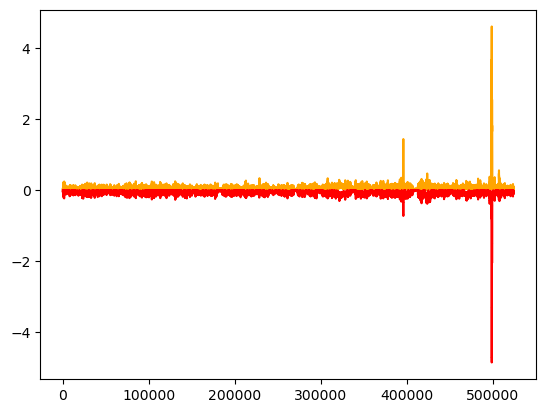

In [11]:
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-03-27/16-43-18-348625/checkpoints/15-val_loss=0.00000.ckpt'
evals = Evals(ckpt_path,device=2)
out = evals(0)
plt.plot(out[1][0,:,0].cpu().numpy(), label='Model Predictions', color='orange') #can be negative because it's pre sigmoid
plt.plot(-out[3][:,0].cpu().numpy(), label='true peaks', color='red')

In [ ]:
#actually this one seems better. Huh it's fine, let's just do evaluation on all of them!!

# and now test it on enformer

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
labels = qtls['label'].to_numpy()

In [ ]:
#make sure it's proper this time
enf_preds = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/enformer_dsqtl.npy')
enf_preds.shape

(17506, 896, 2)

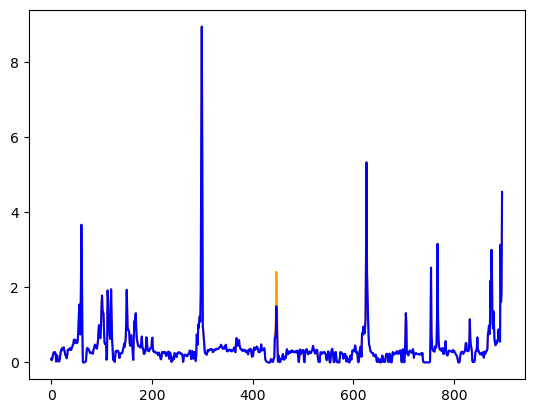

In [3]:
plt.plot(enf_preds[1,:,0], label='Model Predictions', color='orange')
plt.plot(enf_preds[1,:,1], label='Model Predictions Modified', color='blue')

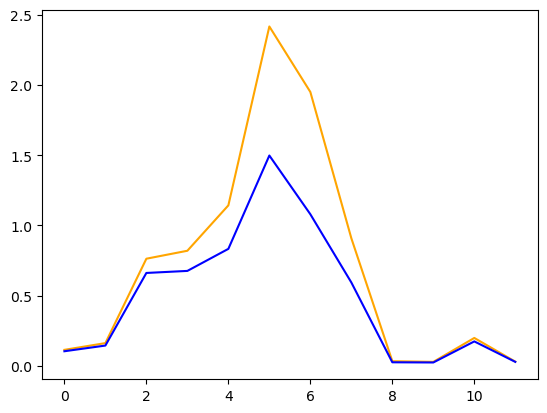

In [ ]:
mid = enf_preds.shape[1] // 2
plt.plot(enf_preds[1,mid-6:mid+6,0], label='Model Predictions', color='orange')
plt.plot(enf_preds[1,mid-6:mid+6,1], label='Model Predictions Modified', color='blue')
#see change is roughly over 4*128 which is not bad!

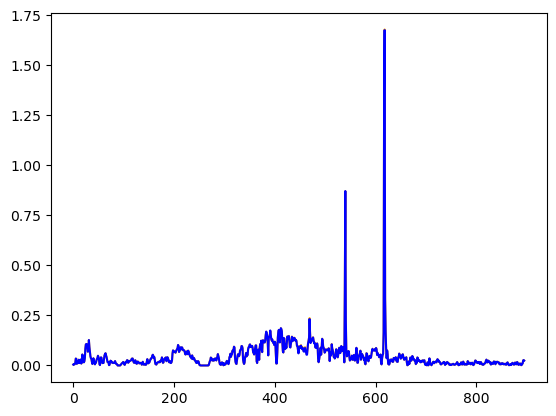

In [4]:
plt.plot(enf_preds[-1,:,0], label='Model Predictions', color='orange')
plt.plot(enf_preds[-1,:,1], label='Model Predictions Modified', color='blue')

In [8]:
#now let's calculate metrics based on whole region or partial
from scipy.spatial.distance import jensenshannon
def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

out_full = predict_snp_effect_scores(enf_preds[:,:,0], enf_preds[:,:,1])
out_2kb = predict_snp_effect_scores(enf_preds[:,440:456,0], enf_preds[:,440:456,1])

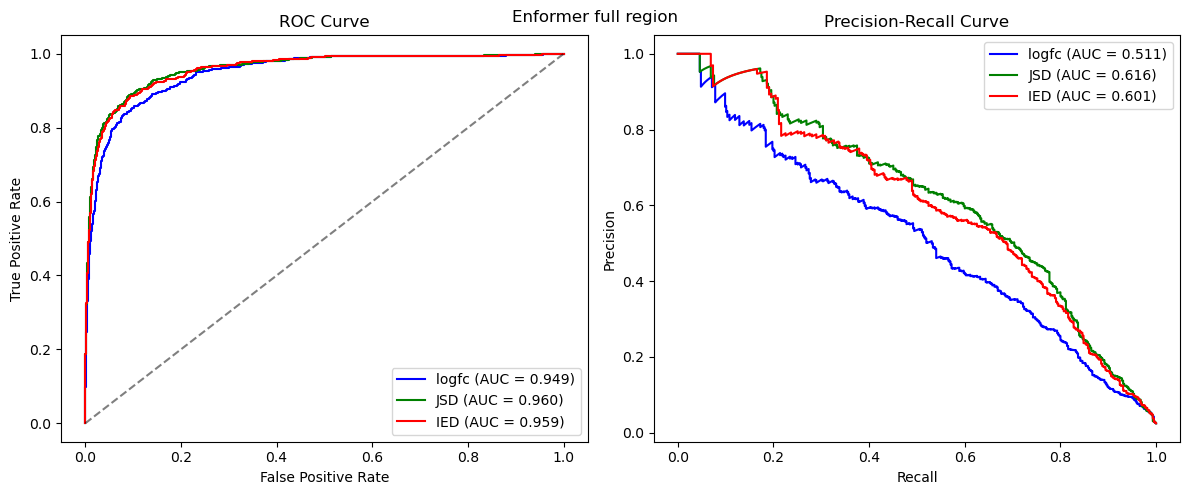

In [15]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
model_names = ['logfc', 'JSD', 'IED']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
for i in range(3):
    fpr, tpr, _ = roc_curve(labels, out_full[i+1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
for i in range(3):
    precision, recall, _ = precision_recall_curve(labels, out_full[i+1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.suptitle('Enformer full region')
plt.show()

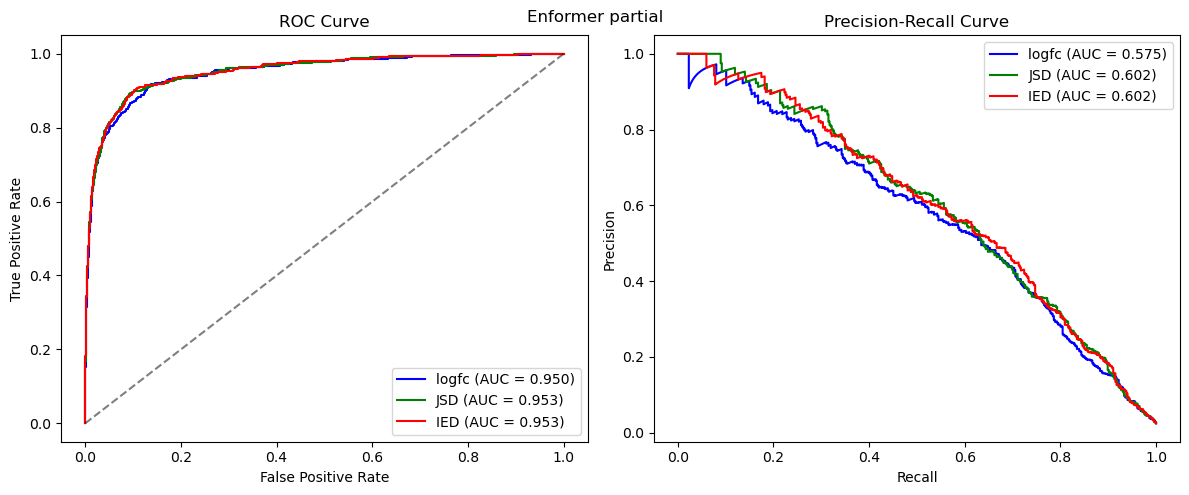

In [16]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
model_names = ['logfc', 'JSD', 'IED']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
for i in range(3):
    fpr, tpr, _ = roc_curve(labels, out_2kb[i+1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
for i in range(3):
    precision, recall, _ = precision_recall_curve(labels, out_2kb[i+1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.suptitle('Enformer partial')
plt.show()

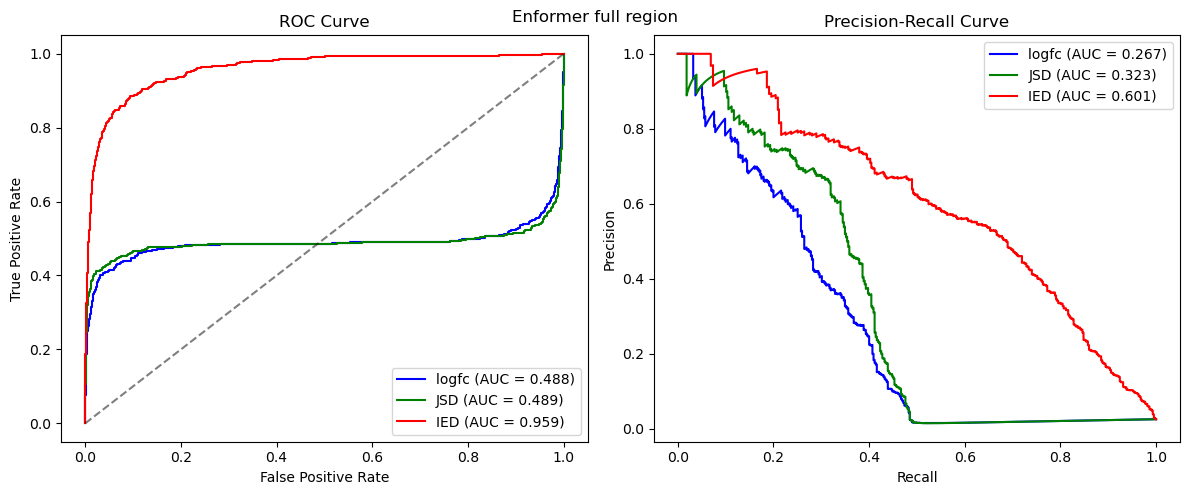

In [18]:
#let's do full with sign differences
def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    # log_counts_diff = 1
    log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

out_full = predict_snp_effect_scores(enf_preds[:,:,0], enf_preds[:,:,1])

model_names = ['logfc', 'JSD', 'IED']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 5))

# === ROC Curve ===
plt.subplot(1, 2, 1)
for i in range(3):
    fpr, tpr, _ = roc_curve(labels, out_full[i+1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# === Precision-Recall Curve ===
plt.subplot(1, 2, 2)
for i in range(3):
    precision, recall, _ = precision_recall_curve(labels, out_full[i+1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.suptitle('Enformer full region')
plt.show()

# and now we look at our models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
labels = qtls['label'].to_numpy()

preds = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl.npy')
preds_peaks = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/peaks_dsqtl.npy')
preds_cat = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/categorical_dsqtl.npy')
preds.shape, preds_peaks.shape, preds_cat.shape

In [ ]:
#and now we compute the metrics
from scipy.spatial.distance import jensenshannon
def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

out_preds = predict_snp_effect_scores(preds[:,:,0], preds[:,:,1])
out_peaks = predict_snp_effect_scores(preds_peaks[:,:,0], preds_peaks[:,:,1])
out_cat = predict_snp_effect_scores(preds_cat[:,:,0], preds_cat[:,:,1])

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
def plot_metrics(out, labels, title):
    model_names = ['logfc', 'JSD', 'IED']
    colors = ['blue', 'green', 'red']

    plt.figure(figsize=(12, 5))

    # === ROC Curve ===
    plt.subplot(1, 2, 1)
    for i in range(3):
        fpr, tpr, _ = roc_curve(labels, out[i+1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # === Precision-Recall Curve ===
    plt.subplot(1, 2, 2)
    for i in range(3):
        precision, recall, _ = precision_recall_curve(labels, out[i+1])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_metrics(out_preds, labels)
plot_metrics(out_peaks, labels)
plot_metrics(out_cat, labels)